https://www.kaggle.com/code/prakharprasad/time-series-vector-autoregression/notebook

In [76]:
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tools.eval_measures import mse,rmse

In [77]:
import pandas as pd
import matplotlib.pyplot as plt

#read the data
df = pd.read_excel("dadoshexano.xlsx")

#check the dtypes
df.dtypes



Date        datetime64[ns]
FOB                float64
CIF                float64
Brent              float64
Barril             float64
tonelada           float64
Dolar              float64
dtype: object

In [78]:
df['Date'] = pd.to_datetime(df.Date , format = '%m/%d/%Y')
data = df.drop(['Date'], axis=1)
data.index = df.Date
data

,FOB,CIF,Brent,Barril,tonelada,Dolar
Date,,,,,,
2014-01-01,3.4006,3.9066,107.040000,254.990688,1002.17,2.3661
2014-02-01,3.4023,3.9083,108.200000,257.916340,984.17,2.4011
2014-03-01,3.0258,3.4815,107.720000,250.567492,987.50,2.3402
2014-04-01,2.9610,3.4167,108.170000,241.521976,993.48,2.2475
2014-05-01,2.8961,3.3519,109.063200,242.218461,NaN,NaN
...,...,...,...,...,...,...
2021-11-01,7.5900,8.1129,80.927140,449.700787,909.13,5.5593
2021-12-01,7.5900,8.1129,74.673505,422.009174,837.05,5.6474
2022-01-01,7.5000,8.0370,85.264486,471.862618,883.10,5.5850


In [79]:
data1 = data.dropna()
data1.tail(12)

,FOB,CIF,Brent,Barril,tonelada,Dolar
Date,,,,,,
2021-03-01,6.1438,6.6894,66.024541,372.784330,723.00,5.6117
2021-04-01,6.3473,6.8761,65.329048,363.368984,695.68,5.6395
2021-05-01,6.0713,6.5994,68.259524,361.165032,735.71,5.3241
2021-06-01,6.1259,6.7207,73.258636,368.630497,762.17,5.1016
2021-07-01,5.9147,6.5096,74.116665,382.197777,807.14,5.1220
2021-08-01,6.2971,6.8929,70.427884,369.867386,804.77,5.2357
2021-09-01,6.3845,6.8937,74.876364,395.323990,803.04,5.2507
2021-10-01,6.6000,7.1131,83.548642,462.857806,886.25,5.4961
2021-11-01,7.5900,8.1129,80.927140,449.700787,909.13,5.5593


In [80]:
def dickey_fuller(series,title='Your Dataset'):
    '''Hypothesis Test for stationarity '''
    print(f'Augmented Dickey Fuller Test for the dataset {title}')
    
    result = adfuller(series.dropna(),autolag='AIC')
    labels = ['ADF test statistics','p-value','#lags','#observations'] # use help(adfuller) to understand why these labels are chosen
    
    outcome = pd.Series(result[0:4],index=labels)
    
    for key,val in result[4].items():
        outcome[f'critical value ({key})'] = val
        
    print(outcome.to_string()) # this will not print the line 'dtype:float64'
    
    if result[1] <= 0.05:
        print('Strong evidence against the null hypothesis') # Ho is Data is not stationary, check help(adfuller)
        print('Reject the null hypothesis')
        print('Data is Stationary')
    else:
        print('Weak evidence against the Null hypothesis')
        print('Fail to reject the null hypothesis')
        print('Data has a unit root and is non stationary')

In [81]:
dickey_fuller(data1['FOB'],title='FOB')

Augmented Dickey Fuller Test for the dataset FOB
ADF test statistics      0.991841
p-value                  0.994179
#lags                    2.000000
#observations           93.000000
critical value (1%)     -3.502705
critical value (5%)     -2.893158
critical value (10%)    -2.583637
Weak evidence against the Null hypothesis
Fail to reject the null hypothesis
Data has a unit root and is non stationary


In [82]:
dickey_fuller(data1['tonelada'],title='tonelada')

Augmented Dickey Fuller Test for the dataset tonelada
ADF test statistics     -2.132345
p-value                  0.231709
#lags                    2.000000
#observations           93.000000
critical value (1%)     -3.502705
critical value (5%)     -2.893158
critical value (10%)    -2.583637
Weak evidence against the Null hypothesis
Fail to reject the null hypothesis
Data has a unit root and is non stationary


In [83]:
data1_diff = data1.diff() # by default, diff performs the first order difference
data1_diff 

,FOB,CIF,Brent,Barril,tonelada,Dolar
Date,,,,,,
2014-01-01,NaN,NaN,NaN,NaN,NaN,NaN
2014-02-01,0.0017,0.0017,1.160000,2.925652,-18.00,0.0350
2014-03-01,-0.3765,-0.4268,-0.480000,-7.348848,3.33,-0.0609
2014-04-01,-0.0648,-0.0648,0.450000,-9.045516,5.98,-0.0927
2014-07-01,-0.0069,-0.0069,0.398300,-0.000936,28.20,-0.0302
...,...,...,...,...,...,...
2021-10-01,0.2155,0.2194,8.672278,67.533816,83.21,0.2454
2021-11-01,0.9900,0.9998,-2.621502,-13.157019,22.88,0.0632
2021-12-01,0.0000,0.0000,-6.253635,-27.691613,-72.08,0.0881


In [84]:
data1_diff = data1_diff.dropna()
data1_diff 

,FOB,CIF,Brent,Barril,tonelada,Dolar
Date,,,,,,
2014-02-01,0.0017,0.0017,1.160000,2.925652,-18.00,0.0350
2014-03-01,-0.3765,-0.4268,-0.480000,-7.348848,3.33,-0.0609
2014-04-01,-0.0648,-0.0648,0.450000,-9.045516,5.98,-0.0927
2014-07-01,-0.0069,-0.0069,0.398300,-0.000936,28.20,-0.0302
2014-08-01,0.0609,0.0609,-5.161200,-6.993737,-69.63,0.0457
...,...,...,...,...,...,...
2021-10-01,0.2155,0.2194,8.672278,67.533816,83.21,0.2454
2021-11-01,0.9900,0.9998,-2.621502,-13.157019,22.88,0.0632
2021-12-01,0.0000,0.0000,-6.253635,-27.691613,-72.08,0.0881


In [85]:
dickey_fuller(data1_diff['FOB'],title='FOB 1st Order Diff')

Augmented Dickey Fuller Test for the dataset FOB 1st Order Diff
ADF test statistics    -7.534032e+00
p-value                 3.516872e-11
#lags                   1.000000e+00
#observations           9.300000e+01
critical value (1%)    -3.502705e+00
critical value (5%)    -2.893158e+00
critical value (10%)   -2.583637e+00
Strong evidence against the null hypothesis
Reject the null hypothesis
Data is Stationary


In [86]:
dickey_fuller(data1_diff['tonelada'],title='tonelada 1st Order Diff')

Augmented Dickey Fuller Test for the dataset tonelada 1st Order Diff
ADF test statistics    -6.416240e+00
p-value                 1.838293e-08
#lags                   1.000000e+00
#observations           9.300000e+01
critical value (1%)    -3.502705e+00
critical value (5%)    -2.893158e+00
critical value (10%)   -2.583637e+00
Strong evidence against the null hypothesis
Reject the null hypothesis
Data is Stationary


In [87]:

# check the length of the transformed df -- > should be 2 rows lesser than the original
len(data1_diff)

95

In [88]:
nobs = 12
train = data1_diff[:-nobs]
test = data1_diff[-nobs:]


In [89]:
len(train), len(test)

(83, 12)


# VAR Model Order Selection

## VAR(p) of order p

So far in my other notebooks on time series on ARIMA and SARIMA, I used the auto_arima from pmdarima library. 
That method won't work here to determine the order of the VAR model. 
I will test this manually with a list of order p values and select the p value which returns the minimum AIC or BIC metric. 
Check Akaike Information Criterion and Bayesian Information Criterion for more details.


In [90]:
p = [1,2,3,4,5,6,7]  # try with list of 7 p values

for i in p:
    model = VAR(train)
    results = model.fit(i)
    print(f'VAR Order {i}')
    print('AIC {}'.format(results.aic))
    print('BIC {}'.format(results.bic))
    print()

VAR Order 1
AIC -1.8651388625972771
BIC -0.6324290042424154

VAR Order 2
AIC -1.9301415752117863
BIC 0.37562427743574744

VAR Order 3
AIC -1.3423487227113244
BIC 2.0520392316989557

VAR Order 4
AIC -0.9324829105259926
BIC 3.566468708082277

VAR Order 5
AIC -0.49029494140196306
BIC 5.12954918378091

VAR Order 6
AIC -0.3159571845909319
BIC 6.441507797896313

VAR Order 7
AIC -0.2751072237959118
BIC 7.6371191155971605



/home/cristian/anaconda3/envs/teste/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/cristian/anaconda3/envs/teste/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/cristian/anaconda3/envs/teste/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/cristian/anaconda3/envs/teste/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated freq

In [91]:
# Order 1 has the least AIC value. Lets select p = 1 in the modeling.
# lets confirm the variables are included in the model
model.endog_names


['FOB', 'CIF', 'Brent', 'Barril', 'tonelada', 'Dolar']

## Fit the VAR(1) model

In [92]:
results = model.fit(5)
results.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Wed, 30, Mar, 2022
Time:                     20:12:40
--------------------------------------------------------------------
No. of Equations:         6.00000    BIC:                    5.12955
Nobs:                     78.0000    HQIC:                   1.75943
Log likelihood:          -458.942    FPE:                   0.808703
AIC:                    -0.490295    Det(Omega_mle):        0.108592
--------------------------------------------------------------------
Results for equation FOB
                 coefficient       std. error           t-stat            prob
------------------------------------------------------------------------------
const               0.019370         0.015968            1.213           0.225
L1.FOB             -0.880010         0.706950           -1.245           0.213
L1.CIF              0.730307         0.714702            1.022        


##  Predict the next 12 values

For predictions, VAR model uses .forecast() instead of predictions. This is similar to the Holt Winters. 
One of the requirement for VAR model is that we need to pass the lag order of the number of previous observations as well. 
Unfortunately, this lag order does not have the datetime index and hence we will have to build this ourselves.


In [93]:
lag_order = results.k_ar
lag_order


5

In [94]:
z = results.forecast(y=train.values[-lag_order:],steps = 12)
z


array([[ 5.75740719e-01,  6.01095023e-01, -6.69426400e+00,
        -2.18537122e+01, -2.77923842e+01,  2.31375152e-03],
       [-1.49159901e-01, -1.44322668e-01, -1.08658614e+01,
        -3.78012631e+01, -1.08509321e+02,  5.96803453e-02],
       [-5.96443418e-01, -5.97804544e-01, -5.05267410e+00,
        -1.73615654e+01, -8.38222277e+01,  1.13188580e-01],
       [-4.01092242e-01, -4.05005829e-01,  3.02672845e-02,
         2.13674402e+00,  2.92708841e+00,  2.81763582e-02],
       [ 1.00245400e-01,  9.82223542e-02,  3.20091663e+00,
         1.29167583e+01,  3.67766987e+01, -4.06445747e-02],
       [ 2.33302289e-01,  2.29376074e-01,  3.49553213e+00,
         1.79185911e+01,  4.13645344e+01,  1.68027159e-02],
       [ 2.84138811e-01,  2.78553958e-01,  8.86641555e-01,
         5.80485409e+00,  1.23525648e+01,  3.38615159e-02],
       [ 1.42223762e-01,  1.43484219e-01, -2.32534627e+00,
        -7.89329624e+00, -1.93004500e+01,  4.18905644e-02],
       [-7.70699870e-02, -7.24786195e-02, -3.811

In [95]:
test

,FOB,CIF,Brent,Barril,tonelada,Dolar
Date,,,,,,
2021-03-01,0.6684,0.6684,4.004522,36.853269,41.91,0.1980
2021-04-01,0.2035,0.1867,-0.695493,-9.415346,-27.32,0.0278
2021-05-01,-0.2760,-0.2767,2.930476,-2.203952,40.03,-0.3154
2021-06-01,0.0546,0.1213,4.999112,7.465465,26.46,-0.2225
2021-07-01,-0.2112,-0.2111,0.858029,13.567280,44.97,0.0204
2021-08-01,0.3824,0.3833,-3.688781,-12.330391,-2.37,0.1137
2021-09-01,0.0874,0.0008,4.448480,25.456604,-1.73,0.0150
2021-10-01,0.2155,0.2194,8.672278,67.533816,83.21,0.2454
2021-11-01,0.9900,0.9998,-2.621502,-13.157019,22.88,0.0632


In [113]:
idx = pd.date_range(start='03/1/2022',periods=12,freq='MS')
df_forecast = pd.DataFrame(z,index=idx,columns=['FOB', 'CIF', 'Brent', 'Barril', 'tonelada', 'Dolar'])

In [114]:
df_forecast[:12]

,FOB,CIF,Brent,Barril,tonelada,Dolar
2022-03-01,0.575741,0.601095,-6.694264,-21.853712,-27.792384,0.002314
2022-04-01,-0.149160,-0.144323,-10.865861,-37.801263,-108.509321,0.059680
2022-05-01,-0.596443,-0.597805,-5.052674,-17.361565,-83.822228,0.113189
2022-06-01,-0.401092,-0.405006,0.030267,2.136744,2.927088,0.028176
2022-07-01,0.100245,0.098222,3.200917,12.916758,36.776699,-0.040645
2022-08-01,0.233302,0.229376,3.495532,17.918591,41.364534,0.016803
2022-09-01,0.284139,0.278554,0.886642,5.804854,12.352565,0.033862
2022-10-01,0.142224,0.143484,-2.325346,-7.893296,-19.300450,0.041891
2022-11-01,-0.077070,-0.072479,-3.811104,-11.947074,-35.826989,0.055574
2022-12-01,-0.149145,-0.145249,-1.663802,-4.074154,-21.596480,0.039146



## Invert the Transformations

The forecasted values represent the 2nd order difference forecast. To compare them to the original data we have to roll back each difference. 
To roll back a first-order difference we take the most recent value on the training side of the original series, and add it to a cumulative sum of forecasted values.
When working with second-order differences we first must perform this operation on the most recent first-order difference.


In [115]:
# Now build the forecast values from the first difference set
df_forecast['FOBForecast'] = df['FOB'].iloc[-nobs-1] + df_forecast['FOB'].cumsum()


In [116]:
df_forecast

,FOB,CIF,Brent,Barril,tonelada,Dolar,FOBForecast
2022-03-01,0.575741,0.601095,-6.694264,-21.853712,-27.792384,0.002314,6.719541
2022-04-01,-0.149160,-0.144323,-10.865861,-37.801263,-108.509321,0.059680,6.570381
2022-05-01,-0.596443,-0.597805,-5.052674,-17.361565,-83.822228,0.113189,5.973937
2022-06-01,-0.401092,-0.405006,0.030267,2.136744,2.927088,0.028176,5.572845
2022-07-01,0.100245,0.098222,3.200917,12.916758,36.776699,-0.040645,5.673091
2022-08-01,0.233302,0.229376,3.495532,17.918591,41.364534,0.016803,5.906393
2022-09-01,0.284139,0.278554,0.886642,5.804854,12.352565,0.033862,6.190532
2022-10-01,0.142224,0.143484,-2.325346,-7.893296,-19.300450,0.041891,6.332755
2022-11-01,-0.077070,-0.072479,-3.811104,-11.947074,-35.826989,0.055574,6.255685
2022-12-01,-0.149145,-0.145249,-1.663802,-4.074154,-21.596480,0.039146,6.106540


In [117]:
df_forecast['toneladaForecast'] = df['tonelada'].iloc[-nobs-1] + df_forecast['tonelada'].cumsum()
df_forecast

,FOB,CIF,Brent,Barril,tonelada,Dolar,FOBForecast,toneladaForecast
2022-03-01,0.575741,0.601095,-6.694264,-21.853712,-27.792384,0.002314,6.719541,695.207616
2022-04-01,-0.149160,-0.144323,-10.865861,-37.801263,-108.509321,0.059680,6.570381,586.698295
2022-05-01,-0.596443,-0.597805,-5.052674,-17.361565,-83.822228,0.113189,5.973937,502.876067
2022-06-01,-0.401092,-0.405006,0.030267,2.136744,2.927088,0.028176,5.572845,505.803155
2022-07-01,0.100245,0.098222,3.200917,12.916758,36.776699,-0.040645,5.673091,542.579854
2022-08-01,0.233302,0.229376,3.495532,17.918591,41.364534,0.016803,5.906393,583.944388
2022-09-01,0.284139,0.278554,0.886642,5.804854,12.352565,0.033862,6.190532,596.296953
2022-10-01,0.142224,0.143484,-2.325346,-7.893296,-19.300450,0.041891,6.332755,576.996503
2022-11-01,-0.077070,-0.072479,-3.811104,-11.947074,-35.826989,0.055574,6.255685,541.169515
2022-12-01,-0.149145,-0.145249,-1.663802,-4.074154,-21.596480,0.039146,6.106540,519.573035


In [118]:
df['tonelada'].iloc[-nobs-1]

723.0

In [119]:
df_forecast['tonelada'].cumsum()

2022-03-01    -27.792384
2022-04-01   -136.301705
2022-05-01   -220.123933
2022-06-01   -217.196845
2022-07-01   -180.420146
2022-08-01   -139.055612
2022-09-01   -126.703047
2022-10-01   -146.003497
2022-11-01   -181.830485
2022-12-01   -203.426965
2023-01-01   -198.874117
2023-02-01   -179.781287
Freq: MS, Name: tonelada, dtype: float64

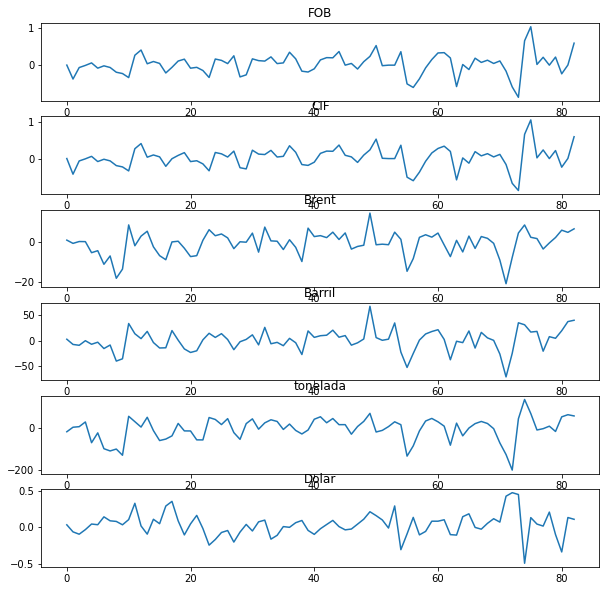

In [120]:
# Plotting the results

results.plot();


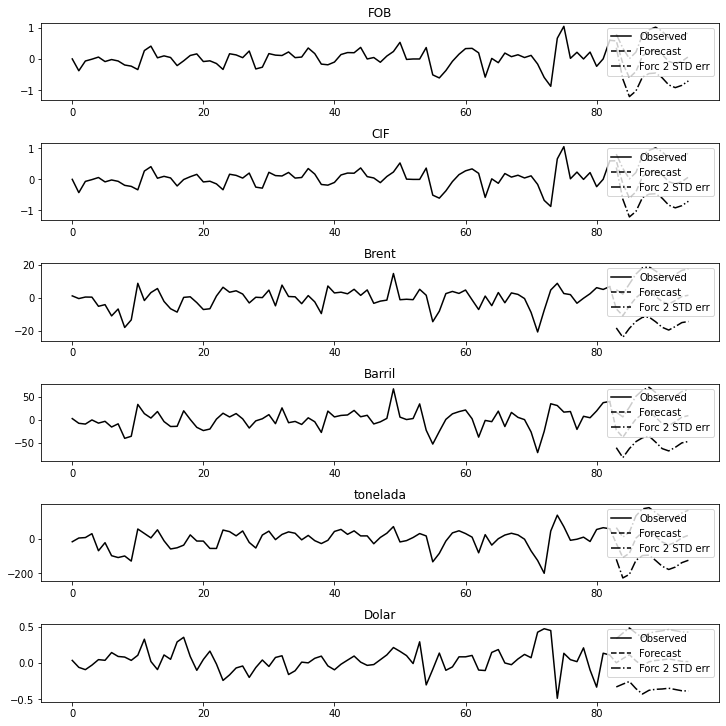

In [121]:
p1=results.plot_forecast(12);
p1.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)

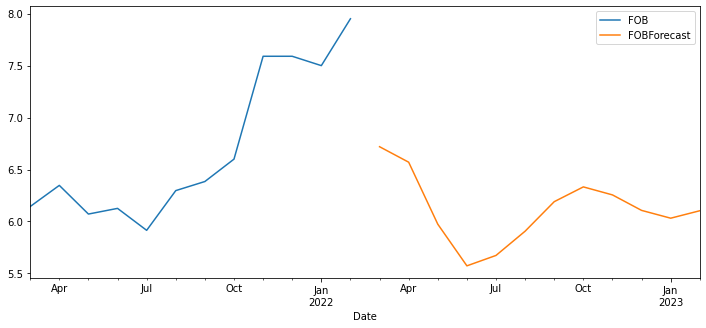

In [122]:
data1['FOB'][-nobs:].plot(figsize=(12,5),legend=True)
df_forecast['FOBForecast'].plot(legend=True);


## Forecas ahead model

In [106]:
lag_order = results.k_ar
lag_order

5

In [107]:
z = results.forecast(y=train.values[-lag_order:],steps = 12)
z

array([[ 5.75740719e-01,  6.01095023e-01, -6.69426400e+00,
        -2.18537122e+01, -2.77923842e+01,  2.31375152e-03],
       [-1.49159901e-01, -1.44322668e-01, -1.08658614e+01,
        -3.78012631e+01, -1.08509321e+02,  5.96803453e-02],
       [-5.96443418e-01, -5.97804544e-01, -5.05267410e+00,
        -1.73615654e+01, -8.38222277e+01,  1.13188580e-01],
       [-4.01092242e-01, -4.05005829e-01,  3.02672845e-02,
         2.13674402e+00,  2.92708841e+00,  2.81763582e-02],
       [ 1.00245400e-01,  9.82223542e-02,  3.20091663e+00,
         1.29167583e+01,  3.67766987e+01, -4.06445747e-02],
       [ 2.33302289e-01,  2.29376074e-01,  3.49553213e+00,
         1.79185911e+01,  4.13645344e+01,  1.68027159e-02],
       [ 2.84138811e-01,  2.78553958e-01,  8.86641555e-01,
         5.80485409e+00,  1.23525648e+01,  3.38615159e-02],
       [ 1.42223762e-01,  1.43484219e-01, -2.32534627e+00,
        -7.89329624e+00, -1.93004500e+01,  4.18905644e-02],
       [-7.70699870e-02, -7.24786195e-02, -3.811

In [108]:
idx = pd.date_range(start='10/1/2020',periods=12,freq='MS')
df_forecast2 = pd.DataFrame(z,index=idx,columns=['FOB', 'CIF', 'Brent', 'Barril', 'tonelada', 'Dolar'])

In [109]:
df_forecast2[:5]

,FOB,CIF,Brent,Barril,tonelada,Dolar
2020-10-01,0.575741,0.601095,-6.694264,-21.853712,-27.792384,0.002314
2020-11-01,-0.149160,-0.144323,-10.865861,-37.801263,-108.509321,0.059680
2020-12-01,-0.596443,-0.597805,-5.052674,-17.361565,-83.822228,0.113189
2021-01-01,-0.401092,-0.405006,0.030267,2.136744,2.927088,0.028176
2021-02-01,0.100245,0.098222,3.200917,12.916758,36.776699,-0.040645


In [110]:
df_forecast2['FOBForecast'] = df['FOB'].iloc[-nobs-1] + df_forecast2['FOB'].cumsum()
df_forecast2

,FOB,CIF,Brent,Barril,tonelada,Dolar,FOBForecast
2020-10-01,0.575741,0.601095,-6.694264,-21.853712,-27.792384,0.002314,6.719541
2020-11-01,-0.149160,-0.144323,-10.865861,-37.801263,-108.509321,0.059680,6.570381
2020-12-01,-0.596443,-0.597805,-5.052674,-17.361565,-83.822228,0.113189,5.973937
2021-01-01,-0.401092,-0.405006,0.030267,2.136744,2.927088,0.028176,5.572845
2021-02-01,0.100245,0.098222,3.200917,12.916758,36.776699,-0.040645,5.673091
2021-03-01,0.233302,0.229376,3.495532,17.918591,41.364534,0.016803,5.906393
2021-04-01,0.284139,0.278554,0.886642,5.804854,12.352565,0.033862,6.190532
2021-05-01,0.142224,0.143484,-2.325346,-7.893296,-19.300450,0.041891,6.332755
2021-06-01,-0.077070,-0.072479,-3.811104,-11.947074,-35.826989,0.055574,6.255685
2021-07-01,-0.149145,-0.145249,-1.663802,-4.074154,-21.596480,0.039146,6.106540


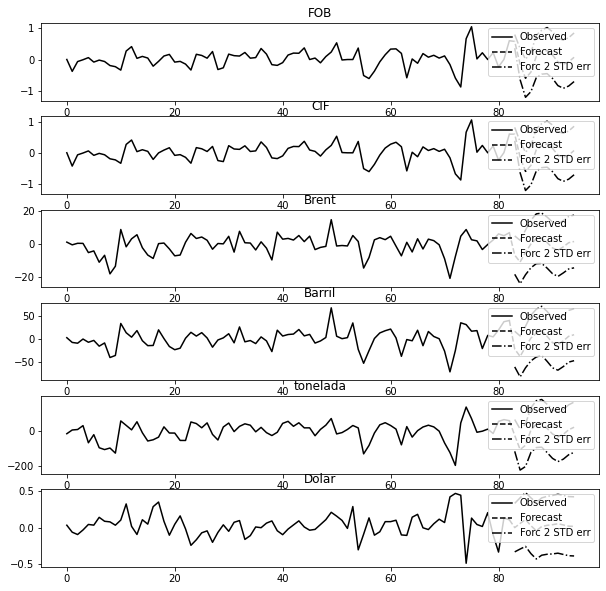

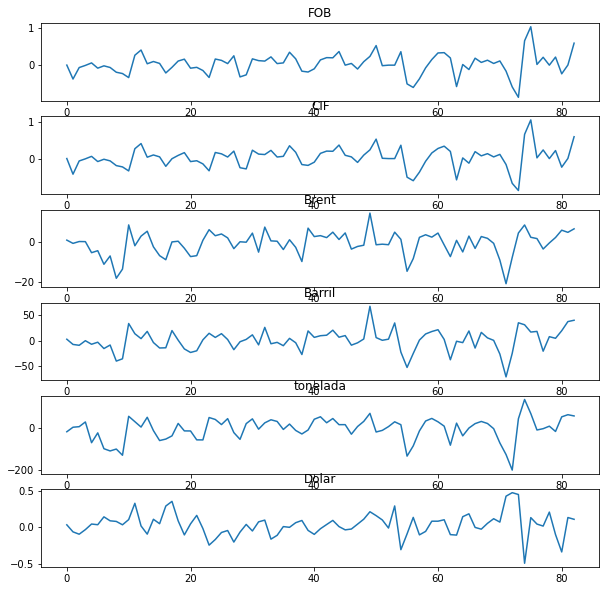

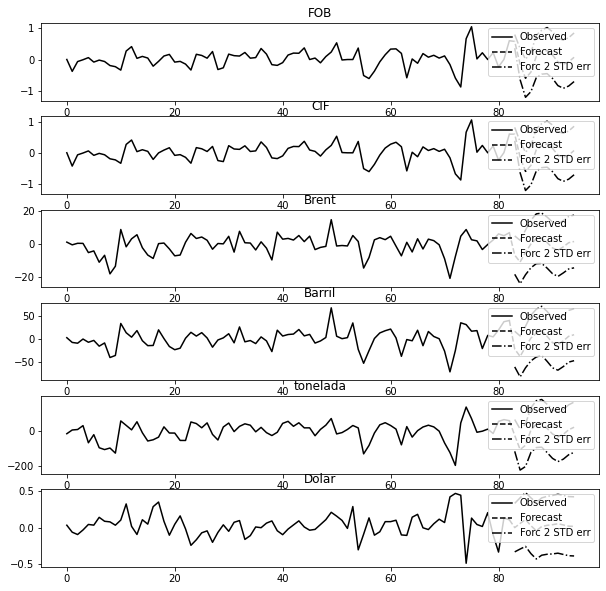

In [111]:
results.plot()
results.plot_forecast(12)

<AxesSubplot:xlabel='Date'>

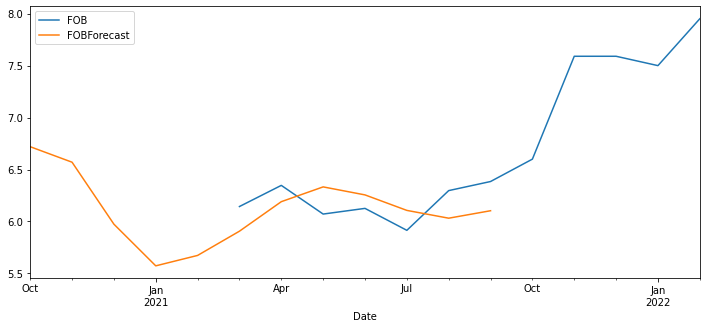

In [112]:
data1['FOB'][-nobs:].plot(figsize=(12,5),legend=True)
df_forecast2['FOBForecast'].plot(legend=True)
